In [23]:
import numpy as np
import pandas as pd

In [24]:
#importing dataset file path
import os
notebook_path = os.path.abspath("letter_recognition_code_1.ipynb")
for dirname, _, filenames in os.walk("Datasets"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Datasets\emnist-letters-test-images-idx3-ubyte
Datasets\emnist-letters-test-labels-idx1-ubyte
Datasets\emnist-letters-test.csv
Datasets\emnist-letters-train-images-idx3-ubyte
Datasets\emnist-letters-train-labels-idx1-ubyte
Datasets\emnist-letters-train.csv


In [25]:
#reading csv files
testing_letter = pd.read_csv("Datasets/emnist-letters-test.csv")
training_letter = pd.read_csv("Datasets/emnist-letters-train.csv")

print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [26]:
#training_letter
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)

#testing_letter
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)

print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


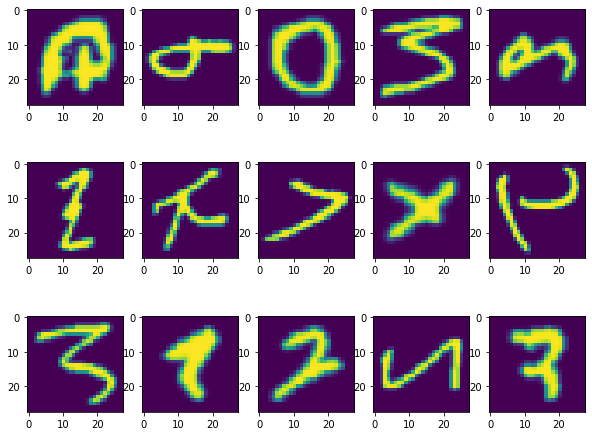

In [27]:
#viewing images from dataset
import matplotlib.pyplot as plt
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [28]:
import tensorflow as tf

In [29]:
#reshaping and normalizing data to be more efficient
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

#transform testing and training letters
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [30]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorlflow.keras.models import Model
#from tensorflow.keras.layers import Dense,Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [34]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
#callback API to save best weights and change learning rate
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights=True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [36]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 [==============================] - 39s 17ms/step - loss: 0.8541 - accuracy: 0.7406 - val_loss: 0.3460 - val_accuracy: 0.8885

Epoch 00001: val_accuracy improved from -inf to 0.88851, saving model to Best_points.h5
Epoch 2/10
2220/2220 [==============================] - 38s 17ms/step - loss: 0.2753 - accuracy: 0.9095 - val_loss: 0.3172 - val_accuracy: 0.8986

Epoch 00002: val_accuracy improved from 0.88851 to 0.89859, saving model to Best_points.h5
Epoch 3/10
2220/2220 [==============================] - 38s 17ms/step - loss: 0.2045 - accuracy: 0.9313 - val_loss: 0.3325 - val_accuracy: 0.9042

Epoch 00003: val_accuracy improved from 0.89859 to 0.90422, saving model to Best_points.h5
Epoch 4/10
2220/2220 [==============================] - 38s 17ms/step - loss: 0.1662 - accuracy: 0.9424 - val_loss: 0.3807 - val_accuracy: 0.9022

Epoch 00004: val_accuracy did not improve from 0.90422
Epoch 5/10
2220/2220 [==============================] - 38s 17ms/step - loss: 0.1550 - 

In [37]:
#plot accuracy vs val_accuracy
import seaborn as sns

Text(0, 0.5, 'Accuracy')

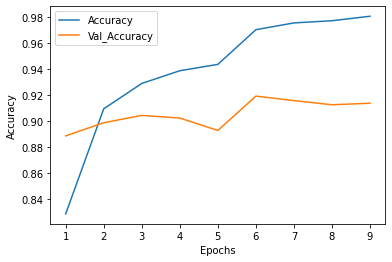

In [38]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')